# Importy (Uruchom)

In [ ]:
#importy inżynierii danych
import pandas as pd
import os
import matplotlib as plt
from google.colab import drive
import seaborn as sns
#drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#import biblioteki do pakowania modelu
import pickle
#import modeli
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
#instalacja aplikacji do web api
!pip install streamlit
!npm install localtunnel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00
npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.678s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit 

In [ ]:
#import bibliotek do udostępniania
import urllib
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
os.getcwd()
#base_data = pd.read_csv("/content/drive/MyDrive/ASI/adult.csv")
base_data = pd.read_csv("adult.csv")
#Google Colab

#os.chdir('/content/drive/MyDrive/ASI')

# Funkcje (Tylko do preparacji danych)

In [ ]:
#Normalizacja Wartości
def normalize(values):
    if pd.api.types.is_numeric_dtype(values):
        min_val = values.min()
        max_val = values.max()
        if(max_val == min_val):
          return values
        return (values - min_val) / (max_val - min_val)
    else:
        # Handle non-numeric values
        return values

In [ ]:
def model(x_train, y_train):
  forest = RandomForestClassifier(n_estimators=10,random_state=0)
  forest.fit(x_train,y_train)
  print(f"Las:{forest.score(x_train,y_train)}")

  lreg = LogisticRegression(max_iter=500)
  lreg.fit(x_train,y_train)
  print(f"lreg:{lreg.score(X_train,y_train)}")

  tree = DecisionTreeClassifier()
  tree.fit(x_train,y_train)
  print(f"DT:{lreg.score(x_train,y_train)}")

  return forest, lreg, tree

# Eksploracja Danych (Powinno działać bez klikania)

In [ ]:
df = base_data
df.eq('?').any()

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income             False
dtype: bool

In [ ]:
#Znajduję dla Workclass kolumnę o najniższej wartości w każdej kategorii
numeric_columns = df.select_dtypes(include='number')
numeric_columns['workclass']=df['workclass']
normalizedvariance=numeric_columns.groupby('workclass').apply(lambda x: normalize(x).var())
lowest_variance_column = normalizedvariance.idxmin(axis=1)
lowest_variance_column



<ipython-input-15-285fbb407584>:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizedvariance=numeric_columns.groupby('workclass').apply(lambda x: normalize(x).var())
<ipython-input-15-285fbb407584>:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizedvariance=numeric_columns.groupby('workclass').apply(lambda x: normalize(x).var())
<ipython-input-15-285fbb407584>:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'nume

workclass
?                   educational-num
Federal-gov         educational-num
Local-gov           educational-num
Never-worked           capital-gain
Private             educational-num
Self-emp-inc        educational-num
Self-emp-not-inc    educational-num
State-gov           educational-num
Without-pay         educational-num
dtype: object

In [ ]:
#Znajduję dla occupation kolumnę o najniższej wartości w każdej kategorii
numeric_columns = df.select_dtypes(include='number')
numeric_columns['occupation']=df['occupation']
normalizedvariance=numeric_columns.groupby('occupation').apply(lambda x: normalize(x).var())
lowest_variance_column = normalizedvariance.idxmin(axis=1)
lowest_variance_column

<ipython-input-16-1ffbea853895>:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizedvariance=numeric_columns.groupby('occupation').apply(lambda x: normalize(x).var())
<ipython-input-16-1ffbea853895>:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizedvariance=numeric_columns.groupby('occupation').apply(lambda x: normalize(x).var())
<ipython-input-16-1ffbea853895>:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'nu

occupation
?                    educational-num
Adm-clerical         educational-num
Armed-Forces         educational-num
Craft-repair         educational-num
Exec-managerial      educational-num
Farming-fishing      educational-num
Handlers-cleaners    educational-num
Machine-op-inspct    educational-num
Other-service        educational-num
Priv-house-serv      educational-num
Prof-specialty       educational-num
Protective-serv      educational-num
Sales                educational-num
Tech-support         educational-num
Transport-moving     educational-num
dtype: object

In [ ]:
#Znajduję dla native-country kolumnę o najniższej wartości w każdej kategorii
numeric_columns = df.select_dtypes(include='number')
numeric_columns['native-country']=df['native-country']
df[df['native-country'] == 'Holand-Netherlands']
normalizedvariance=numeric_columns.groupby('native-country').apply(lambda x: normalize(x).var())
lowest_variance_column = normalizedvariance.idxmin(axis=1)
lowest_variance_column

<ipython-input-17-c27e3066d31e>:5: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizedvariance=numeric_columns.groupby('native-country').apply(lambda x: normalize(x).var())
<ipython-input-17-c27e3066d31e>:5: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizedvariance=numeric_columns.groupby('native-country').apply(lambda x: normalize(x).var())
<ipython-input-17-c27e3066d31e>:5: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specif

native-country
?                             educational-num
Cambodia                      educational-num
Canada                        educational-num
China                         educational-num
Columbia                      educational-num
Cuba                          educational-num
Dominican-Republic            educational-num
Ecuador                          capital-loss
El-Salvador                   educational-num
England                       educational-num
France                        educational-num
Germany                       educational-num
Greece                        educational-num
Guatemala                     educational-num
Haiti                         educational-num
Holand-Netherlands                        NaN
Honduras                      educational-num
Hong                          educational-num
Hungary                       educational-num
India                         educational-num
Iran                          educational-num
Ireland            

# Preparacja Danych (NIE KLIKAĆ, WSZYSTKO ZAPISANE JUŻ W CSV)

In [ ]:
#Przydzielam do workclassa kategorię w oparciu o średnią capital-gaina
median_capital_gain = df.groupby('workclass')['capital-gain'].mean()
median_capital_gain=median_capital_gain.drop('?')
df['workclass'] = df['workclass'].replace({'?': median_capital_gain.idxmin()})

#Przydzielam do occupation kategorię w oparciu o średnią capital-gaina
median_capital_gain = df.groupby('occupation')['capital-gain'].mean()
median_capital_gain=median_capital_gain.drop('?')
df['occupation'] = df['occupation'].replace({'?': median_capital_gain.idxmin()})

#Przydzielam do native-country kategorię w oparciu o średnią capital-gaina
median_capital_gain = df.groupby('native-country')['capital-gain'].mean()
median_capital_gain=median_capital_gain.drop('?')
df['native-country'] = df['native-country'].replace({'?': median_capital_gain.idxmin()})

#Dodaję jedną kolumnę
df['gain-per-hour']=df['capital-gain']/df['hours-per-week']


#Obcinanie skrajnych wartości
filtered_df = df[(df['age'] >= df['age'].quantile(0.2)) & (df['age'] <= df['age'].quantile(0.8))]
filtered_df = filtered_df[(filtered_df['capital-gain'] >= filtered_df['capital-gain'].quantile(0.2)) & (df['capital-gain'] <= filtered_df['capital-gain'].quantile(1))]
filtered_df = filtered_df[(filtered_df['capital-loss'] >= filtered_df['capital-loss'].quantile(0.2)) & (df['capital-loss'] <= filtered_df['capital-loss'].quantile(1))]
filtered_df = filtered_df[(filtered_df['hours-per-week'] >= filtered_df['hours-per-week'].quantile(0.2)) & (df['hours-per-week'] <= filtered_df['hours-per-week'].quantile(0.99))]
filtered_df = filtered_df[(filtered_df['gain-per-hour'] >= filtered_df['gain-per-hour'].quantile(0.2)) & (df['gain-per-hour'] <= filtered_df['gain-per-hour'].quantile(0.99))]



<ipython-input-18-1d6224fa569c>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['capital-gain'] >= filtered_df['capital-gain'].quantile(0.2)) & (df['capital-gain'] <= filtered_df['capital-gain'].quantile(1))]
<ipython-input-18-1d6224fa569c>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['capital-loss'] >= filtered_df['capital-loss'].quantile(0.2)) & (df['capital-loss'] <= filtered_df['capital-loss'].quantile(1))]
<ipython-input-18-1d6224fa569c>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['hours-per-week'] >= filtered_df['hours-per-week'].quantile(0.2)) & (df['hours-per-week'] <= filtered_df['hours-per-week'].quantile(0.99))]
<ipython-input-18-1d6224fa569c>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(fi

In [ ]:

filtered_df_normalized = filtered_df.apply(lambda x: normalize(x))


In [ ]:
filtered_df.to_csv('filtered_data.csv', index=False)

filtered_df_normalized.to_csv('filtered_data_normalized.csv', index=False)

# Trenowanie

In [ ]:
search_for_minmax_data = pd.read_csv('/content/drive/MyDrive/ASI/filtered_data.csv')
# Select only numerical columns
numerical_columns = search_for_minmax_data.select_dtypes(include='number')

# Use describe to get statistics, including min and max
minmax_data = numerical_columns.describe().loc[['min', 'max']]

# Display the table
print(minmax_data)

      age     fnlwgt  educational-num  capital-gain  capital-loss  \
min  26.0    13769.0              1.0           0.0           0.0   
max  51.0  1490400.0             16.0       15024.0        3900.0   

     hours-per-week  gain-per-hour  
min            40.0            0.0  
max            80.0          375.6  


In [ ]:
#Wczytuję dane
data = pd.read_csv('/content/drive/MyDrive/ASI/filtered_data_normalized.csv')

#data.isna().any()

In [ ]:
# Zamiana kolumn stringów na kategoryczne
string_columns = data.select_dtypes(include=['object']).columns
for column in string_columns:
    data[column] = data[column].astype('category')
###



X = data.drop('education', axis=1) #usuwam wykształcenie bo educational-num robi to samo
#X= X.drop('fnlwgt',axis=1)

# Wydzielam kolumnę do przewidywania
predict = 'income'
X = X.drop(predict, axis=1)
y = data[predict]

# Tworzę zestaw testowy i treningowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#wybór modelu, Logistyczna Regresja przyniosła największe Accuracy./
model = LogisticRegression()
#model = RandomForestClassifier()
#model = DecisionTreeClassifier()
#model = KNeighborsClassifier()

In [ ]:
#Przygotowuję model na dane kategoryczne
label_encoders = {}
#label_encoder = LabelEncoder()
#X_test_encoded=pd.DataFrame()
#X_train_encoded=pd.DataFrame()
X_train_encoded = pd.get_dummies(X_train, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'], drop_first=True)
#for column in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
#    label_encoder = LabelEncoder()
#    X_train_encoded[column] = label_encoder.fit_transform(X_train[column])
#   X_test_encoded[column] = label_encoder.transform(X_test[column])
#    label_encoders[column] = label_encoder
###

###### DZIAŁANIE MODELU I TESTY######
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', report)
###### ######

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8095425867507886
Confusion Matrix:
 [[3151  360]
 [ 606  955]]
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.84      0.90      0.87      3511
        >50K       0.73      0.61      0.66      1561

    accuracy                           0.81      5072
   macro avg       0.78      0.75      0.77      5072
weighted avg       0.80      0.81      0.80      5072



In [ ]:
with open('model_ASCI.pkl', 'wb') as file:
    saved_data = {
        'model': model,
       'X_train_encoded': X_train_encoded,
       "minmax_data": minmax_data
     #   'y_train': y_train,
    }
    pickle.dump(saved_data, file)

In [ ]:
#testdata = pd.read_csv('filtered_data.csv')
#testdata.min()
X_train_encoded

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,gain-per-hour,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
14801,0.92,0.125841,0.533333,0.0,0.000000,0.250,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17690,0.60,0.140023,1.000000,0.0,0.000000,0.250,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5348,0.40,0.094342,0.866667,1.0,0.000000,0.000,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13228,0.00,0.195603,0.533333,0.0,0.000000,0.125,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
11614,0.40,0.108378,0.400000,0.0,0.000000,0.000,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.56,0.208642,0.533333,0.0,0.000000,0.500,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5390,0.68,0.025979,0.933333,0.0,0.487692,0.250,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
860,0.64,0.256258,0.800000,0.0,0.000000,0.000,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15795,0.56,0.046316,0.800000,0.0,0.000000,0.000,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#categorical_columns = []
#for col in X.columns:
#    if X[col].nunique() < len(X) * 0.05:  # You can adjust the threshold as needed
#        categorical_columns.append(col)

# Display the identified categorical columns
#print("Categorical columns:")
#for col in categorical_columns:
#  unique_categories = X[col].unique()
 # print(f"Unique categories in '{col}':")
 # print(unique_categories)

# Api

In [ ]:
%%writefile app.py
import pickle
import streamlit as st
import pandas as pd

# Load the model
filename = "model_ASCI.pkl"
#model = pickle.load(open(filename, 'rb'))
with open(filename, 'rb') as file:
    loaded_data = pickle.load(file)

loaded_model = loaded_data['model']
loaded_X_train_encoded = loaded_data['X_train_encoded']
loaded_minmax_data = loaded_data['minmax_data']


#Streamlit app
st.title("Income Prediction App")
def normalize(minmax_data, column_name, value):
    if pd.api.types.is_numeric_dtype(minmax_data[column_name]):
        min_val = minmax_data.at['min', column_name]
        max_val = minmax_data.at['max', column_name]

        if max_val != min_val:
            normalized_value = (value - min_val) / (max_val - min_val)
            return normalized_value
        else:
            return value

# User input for prediction
age = st.slider("Age", 18, 100)
workclass = st.selectbox("Workclass", ["Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov", "Local-gov", "State-gov", "Without-pay", "Never-worked"])
fnlwgt = st.number_input('Final Weight (fnlwgt): ')
educational_num = st.slider("Education Level", 1, 16)
marital_status = st.selectbox("Marital Status", ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'])
occupation = st.selectbox("Occupation", ['Farming-fishing', 'Protective-serv', 'Machine-op-inspct',
       'Priv-house-serv', 'Adm-clerical', 'Exec-managerial',
       'Prof-specialty', 'Tech-support', 'Sales', 'Other-service',
       'Craft-repair', 'Handlers-cleaners', 'Transport-moving',
       'Armed-Forces'])
relationship = st.selectbox("Relationship", ['Husband', 'Unmarried', 'Not-in-family', 'Own-child', 'Wife', 'Other-relative'])
race  = st.selectbox("Race", ['White', 'Black', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'])
gender = st.selectbox("Gender", ['Male', 'Female'])
capital_gain = st.number_input("Capital Gain: ")
capital_loss = st.number_input("Capital Loss: ")
hours_per_week = st.number_input("Hours per Week: ")
native_country = st.selectbox("Native Country", ['United-States', 'Holand-Netherlands', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Philippines', 'Puerto-Rico',
       'Germany', 'Japan', 'India', 'Cambodia', 'Poland', 'Laos',
       'England', 'Cuba', 'Haiti', 'South', 'Italy', 'Canada', 'Portugal',
       'China', 'El-Salvador', 'Honduras', 'Iran', 'Guatemala',
       'Nicaragua', 'Yugoslavia', 'Vietnam', 'Columbia', 'Hong', 'Greece',
       'Peru', 'Thailand', 'Trinadad&Tobago', 'Scotland', 'Taiwan',
       'Ecuador', 'Jamaica', 'Outlying-US(Guam-USVI-etc)', 'Hungary',
       'France'])




# Button to make predictions
if st.button("Predict"):
    gain_per_hour = capital_gain / hours_per_week if hours_per_week != 0 else 0
    input_data = pd.DataFrame({
        'age': [normalize(loaded_minmax_data, 'age', age)],
        'workclass': [workclass],
        'fnlwgt': [normalize(loaded_minmax_data, 'fnlwgt', fnlwgt)],
        'educational-num': [normalize(loaded_minmax_data, 'educational-num', educational_num)],
        'marital-status': [marital_status],
        'occupation': [occupation],
        'relationship': [relationship],
        'race': [race],
        'gender': [gender],
        'capital-gain': [normalize(loaded_minmax_data, 'capital-gain', capital_gain)],
        'capital-loss': [normalize(loaded_minmax_data, 'capital-loss', capital_loss)],
        'hours-per-week': [normalize(loaded_minmax_data, 'hours-per-week', hours_per_week)],
        'native-country': [native_country],
        'gain-per-hour': [normalize(loaded_minmax_data, 'gain-per-hour', gain_per_hour)]
    })

    input_data_encoded = pd.get_dummies(input_data, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'], drop_first=True)
    for col in loaded_X_train_encoded:
        if col not in input_data_encoded.columns:
            input_data_encoded[col]=0

    prediction =  loaded_model.predict(input_data_encoded)
    st.write(f"The predicted income is: {prediction}")


Overwriting app.py


In [ ]:
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.32.162.87


In [ ]:
!streamlit run app.py &>logs.txt &

In [ ]:
!npx localtunnel --port 8500

npx: installed 22 in 3.658s
your url is: https://wicked-dragons-remain.loca.lt
^C


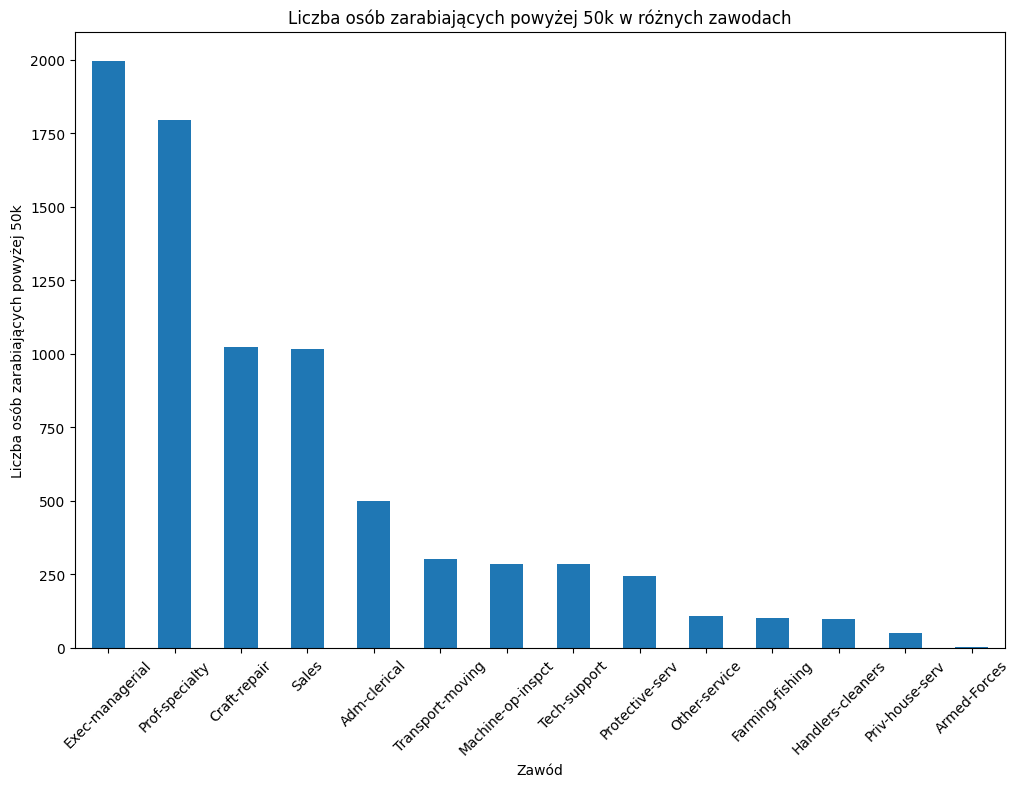

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Załaduj dane
df = pd.read_csv('/content/drive/MyDrive/ASI/filtered_data.csv')

# Filtruj dane, aby uwzględnić tylko kolumny 'occupation' i 'income'
occupation_income_df = df[['occupation', 'income']]

# Oblicz liczbę osób zarabiających powyżej 50k w każdym zawodzie
income_over_50k_by_occupation = occupation_income_df[occupation_income_df['income'] == '>50K']['occupation'].value_counts()

# Sortowanie danych
income_over_50k_by_occupation_sorted = income_over_50k_by_occupation.sort_values(ascending=False)

# Tworzenie wykresu
plt.figure(figsize=(12, 8))
income_over_50k_by_occupation_sorted.plot(kind='bar')
plt.title('Liczba osób zarabiających powyżej 50k w różnych zawodach')
plt.xlabel('Zawód')
plt.ylabel('Liczba osób zarabiających powyżej 50k')
plt.xticks(rotation=45)
plt.show()


# Model

In [ ]:
%%writefile model.py
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OrdinalEncoder

search_for_minmax_data = pd.read_csv('/content/drive/MyDrive/ASI/filtered_data.csv')
# Select only numerical columns
numerical_columns = search_for_minmax_data.select_dtypes(include='number')

# Use describe to get statistics, including min and max
minmax_data = numerical_columns.describe().loc[['min', 'max']]

#Wczytuję dane
data = pd.read_csv('/content/drive/MyDrive/ASI/filtered_data_normalized.csv')

#data.isna().any()
# Zamiana kolumn stringów na kategoryczne
string_columns = data.select_dtypes(include=['object']).columns
for column in string_columns:
    data[column] = data[column].astype('category')
###



X = data.drop('education', axis=1) #usuwam wykształcenie bo educational-num robi to samo


# Wydzielam kolumnę do przewidywania
predict = 'income'
X = X.drop(predict, axis=1)
y = data[predict]

# Tworzę zestaw testowy i treningowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#wybór modelu, Logistyczna Regresja przyniosła największe Accuracy./
model = LogisticRegression()

#Przygotowuję model na dane kategoryczne
label_encoders = {}
#label_encoder = LabelEncoder()
#X_test_encoded=pd.DataFrame()
#X_train_encoded=pd.DataFrame()
X_train_encoded = pd.get_dummies(X_train, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'], drop_first=True)
#for column in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
#    label_encoder = LabelEncoder()
#    X_train_encoded[column] = label_encoder.fit_transform(X_train[column])
#   X_test_encoded[column] = label_encoder.transform(X_test[column])
#    label_encoders[column] = label_encoder
###

###### DZIAŁANIE MODELU I TESTY######
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', report)
###### ######

with open('model_ASCI.pkl', 'wb') as file:
    saved_data = {
        'model': model,
       'X_train_encoded': X_train_encoded,
       "minmax_data": minmax_data
     #   'y_train': y_train,
    }
    pickle.dump(saved_data, file)